In [1]:
# Importar dependências
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# Criando o objeto modelo e variável para indicar a pasta com os dados
data_path = "../../../input/bes/v1.0.0/"
geo_model = gp.create_model("BES_Workflow_v1.0.0")

No module named 'osgeo'


In [2]:
%%time
# Inicializando os dados, a extensão e a resolução do modelo.
gp.init_data(geo_model,
             extent=[0, 37037, 0, 107096, -4745, 0],
             resolution=[100, 100, 50],
             path_i=data_path + "surfaces_points_processed.csv",
             path_o=data_path + "orientations_points_processed.csv")

'''# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_Series_1": ('RIO_DOCE', 
                                             'CARAVELAS',
                                             'URUCUTUCA',
                                             'REGENCIA',
                                             'SAO_MATEUS',
                                             'MARIRICU',),
                          "Basement_series": ('basement')})
'''
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_Series_1": ('RIO_DOCE', 'CARAVELAS'),
                          "Strat_Series_2": ('URUCUTUCA', 'REGENCIA'),
                          "Strat_Series_3": ('SAO_MATEUS'),
                          "Strat_Series_4": ('MARIRICU'),
                          "Basement_series": ('basement')})

gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range                  113418.73
$C_o$               306281133.57
drift equations  [3, 3, 3, 3, 3]
Wall time: 27.3 s



Lithology ids 
  [7.         7.         7.         ... 2.         2.         1.00006581] 

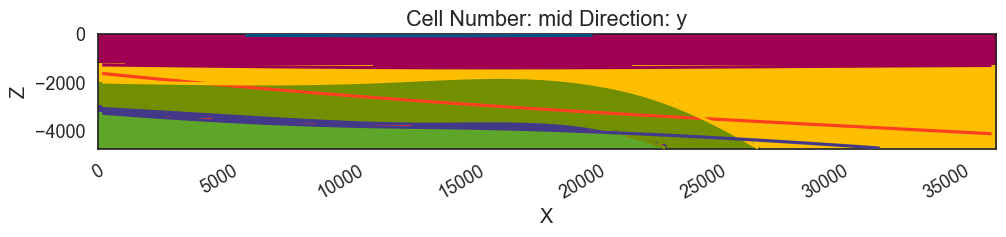

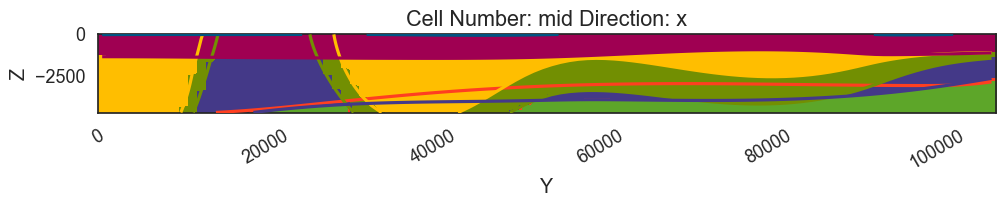

In [3]:
# 2D Plot
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

# 3D Plot
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False)

In [2]:
# Inicializando os dados, a extensão e a resolução do modelo.
gp.init_data(
    geo_model,
    extent=[0, 20702, 0, 107096, -4745, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "surfaces_points_processed_2.csv",
    path_o=data_path + "orientations_points_processed_2.csv",
)

Active grids: ['regular']


BES_Workflow_v1.0.0  2023-08-17 13:06

In [3]:
geo_model.additional_data

values
Structure isLith                                              True
          isFault                                            False
          number faults                                          0
          number surfaces                                        6
          number series                                          2
          number surfaces per series                        [6, 0]
          len surfaces surface_points        [14, 6, 14, 12, 8, 8]
          len series surface_points                        [62, 0]
          len series orientations                           [1, 0]
Options   dtype                                            float64
          output                                           geology
          aesara_optimizer                            fast_compile
          device                                               cpu
          verbosity                                           None
Kriging   range                                      109181.688231
          $C_o$                                   283824786.785714
          drift equations                                   [3, 3]
Rescaling rescaling factor                                214192.0
          centers                      [10351.0, 53548.0, -2391.5]

In [4]:
geo_model.get_data()

X         Y     Z    smooth   surface           G_x   
surface_points 0    8093.0  107096.0   -38  0.000002  RIO_DOCE           NaN  \
               6   18521.0   11331.0   -52  0.000002  RIO_DOCE           NaN   
               11      0.0    2025.0   -43  0.000002  RIO_DOCE           NaN   
               15  20702.0   92765.0   -62  0.000002  RIO_DOCE           NaN   
               19   8669.0   15549.0   -47  0.000002  RIO_DOCE           NaN   
...                    ...       ...   ...       ...       ...           ...   
               31   9352.0       0.0 -3739  0.000002  MARIRICU           NaN   
               36   1629.0    4558.0 -2583  0.000002  MARIRICU           NaN   
               49   5147.0   15670.0 -3026  0.000002  MARIRICU           NaN   
               61  11843.0  101708.0 -3080  0.000002  MARIRICU           NaN   
orientations   0    8093.0  107096.0   -38  0.010000  RIO_DOCE  1.000000e-12   

                            G_y  G_z  
surface_points 0            NaN  NaN  
               6            NaN  NaN  
               11           NaN  NaN  
               15           NaN  NaN  
               19           NaN  NaN  
...                         ...  ...  
               31           NaN  NaN  
               36           NaN  NaN  
               49           NaN  NaN  
               61           NaN  NaN  
orientations   0   1.000000e-12  1.0  

[63 rows x 8 columns]

In [7]:
gp.get_data(geo_model, "surface_points").head()

,X,Y,Z,smooth,surface
0,8093.0,107096.0,-38,2.00e-06,RIO_DOCE
6,18521.0,11331.0,-52,2.00e-06,RIO_DOCE
11,0.0,2025.0,-43,2.00e-06,RIO_DOCE
15,20702.0,92765.0,-62,2.00e-06,RIO_DOCE
19,8669.0,15549.0,-47,2.00e-06,RIO_DOCE


In [8]:
gp.get_data(geo_model, "orientations").head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,8093.0,107096.0,-38,1.00e-12,1.00e-12,1.0,0.01,RIO_DOCE
1,20702.0,92765.0,-1280,1.00e-12,1.75e-02,1.0,0.01,CARAVELAS
2,9352.0,0.0,-1607,1.00e-12,1.00e-12,1.0,0.01,URUCUTUCA
4,8669.0,15549.0,-3546,1.00e-12,1.00e-12,1.0,0.01,REGENCIA
3,13342.0,56598.0,-3851,1.00e-12,1.00e-12,1.0,0.01,SAO_MATEUS


In [9]:
gp.get_data(geo_model, "series")

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


In [10]:
gp.get_data(geo_model, "surfaces")

,surface,series,order_surfaces,color,id
0,RIO_DOCE,Default series,1,#015482,1
1,CARAVELAS,Default series,2,#9f0052,2
2,URUCUTUCA,Default series,3,#ffbe00,3
3,REGENCIA,Default series,4,#728f02,4
4,SAO_MATEUS,Default series,5,#443988,5
5,MARIRICU,Default series,6,#ff3f20,6
6,basement,Basement,1,#5DA629,7


In [11]:
geo_model.delete_surface_points_basement()

True

In [5]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "RIO_DOCE",
            "CARAVELAS",
            "URUCUTUCA",
            "REGENCIA",
            "SAO_MATEUS",
            "MARIRICU",
        ),
        "Basement_series": ("basement"),
    },
)

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[ 2.0702000e+02,  1.0709600e+03, -4.6975500e+03],
       [ 2.0702000e+02,  1.0709600e+03, -4.6026500e+03],
       [ 2.0702000e+02,  1.0709600e+03, -4.5077500e+03],
       ...,
       [ 2.0494980e+04,  1.0602504e+05, -2.3725000e+02],
       [ 2.0494980e+04,  1.0602504e+05, -1.4235000e+02],
       [ 2.0494980e+04,  1.0602504e+05, -4.7450000e+01]])

In [ ]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("RIO_DOCE", "CARAVELAS"),
        "Strat_Series_2": ("URUCUTUCA", "REGENCIA"),
        "Strat_Series_3": ("SAO_MATEUS"),
        "Strat_Series_4": ("MARIRICU"),
        "Basement_series": ("basement"),
    },
)

# Ver o grid do modelo
geo_model.grid

In [6]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,RIO_DOCE,Strat_Series,1,#015482,1
1,CARAVELAS,Strat_Series,2,#9f0052,2
2,URUCUTUCA,Strat_Series,3,#ffbe00,3
3,REGENCIA,Strat_Series,4,#728f02,4
4,SAO_MATEUS,Strat_Series,5,#443988,5
5,MARIRICU,Strat_Series,6,#ff3f20,6
6,basement,Basement_series,1,#5DA629,7


In [7]:
geo_model.set_default_orientation()

In [14]:
geo_model.rescaling

,values
rescaling factor,214192.0
centers,"[18518.5, 53548.0, -2391.5]"


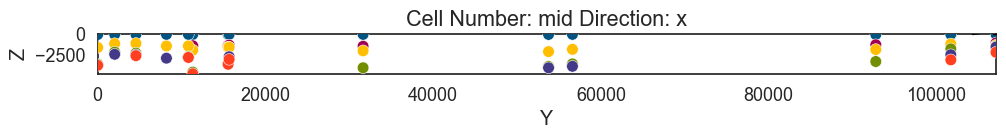

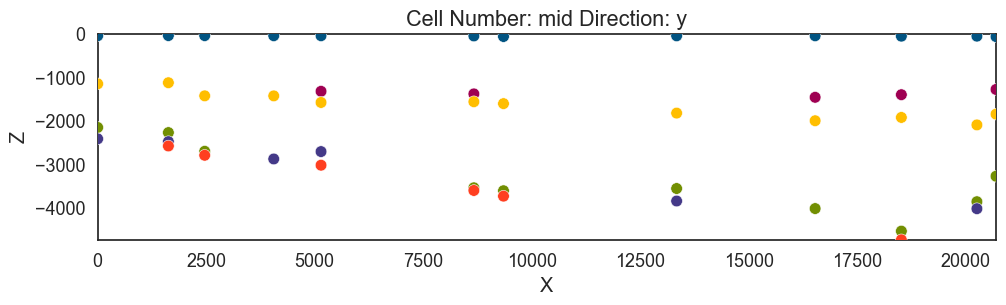

In [7]:
# Ver em 2D os dados nas 3 direções
gp.plot_2d(
    geo_model,
    direction=["x"],
    show_data=True,
    show_boundaries=True,
    legend=False,
    show=True,
)

gp.plot_2d(
    geo_model,
    direction=["y"],
    show_data=True,
    show_boundaries=True,
    legend=False,
    show=True,
)

# gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [8]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
)

In [9]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                            values
range               109181.688231
$C_o$            283824786.785714
drift equations            [3, 3]
CPU times: total: 17.1 s
Wall time: 17.5 s


In [10]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 11.2 s
Wall time: 1.52 s



Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

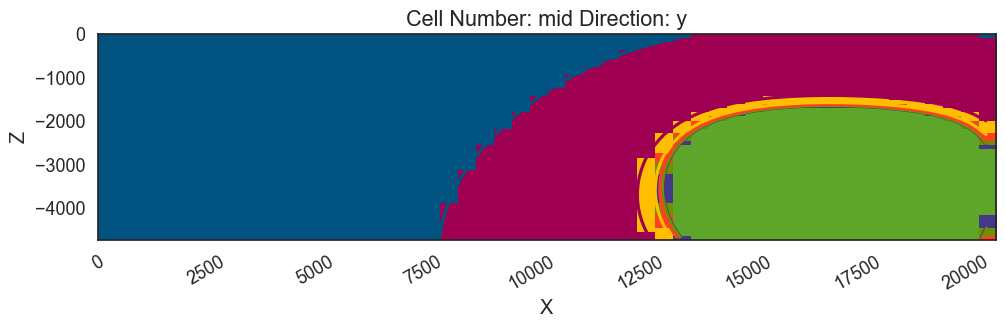

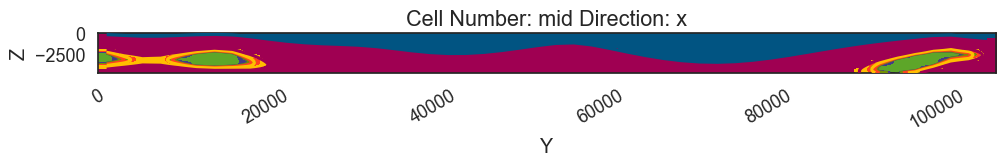

In [11]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)

In [12]:
# Visualizar o modelo em 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(
    geo_model,
    image=False,
    plotter_type="basic",
    show_data=True,
    show_results=True,
    show_lith=True,
    show_boundaries=True,
)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(geo_model, path="../../output/Lake_PreSal/v6/", compress=True)